In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,explained_variance_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("data.csv", encoding="ISO-8859-1",low_memory=False)

In [3]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [5]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [6]:
drop_columns = ["stn_code", "sampling_date","location", "agency", "type","location_monitoring_station","pm2_5","spm"]
data=data.drop(labels=drop_columns, axis=1)

In [7]:
data = data[data['date'] > '2010-01-01']  

In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data['year'],data['month'],data['day'] = data.date.dt.year, data.date.dt.month, data.date.dt.day

In [10]:
data=data.dropna()

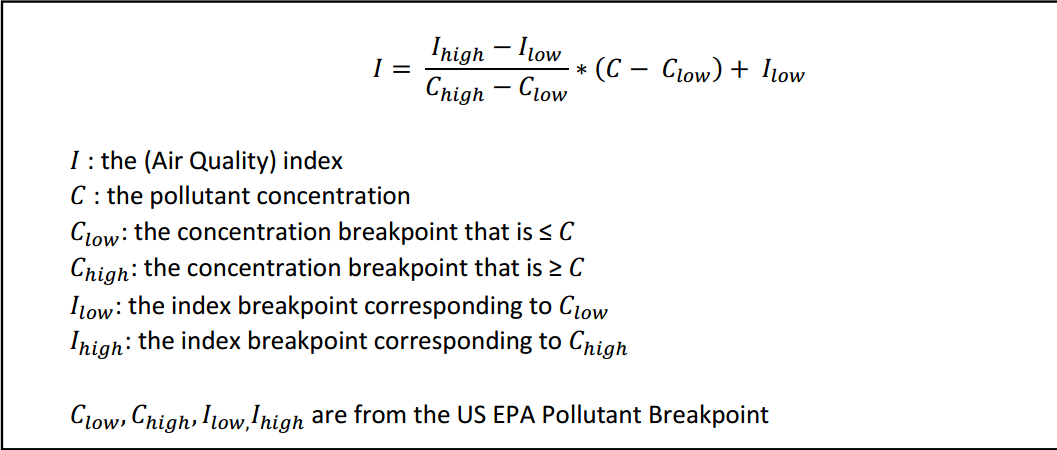

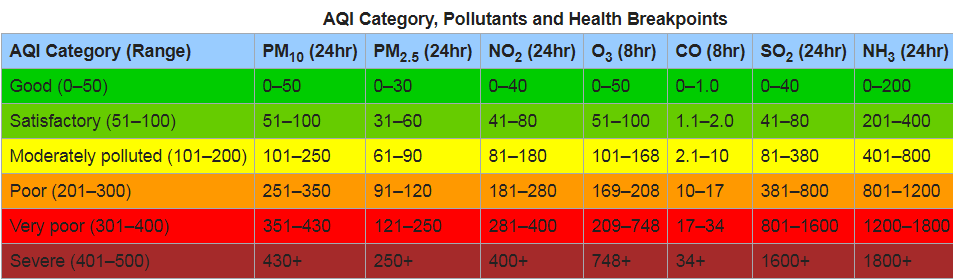

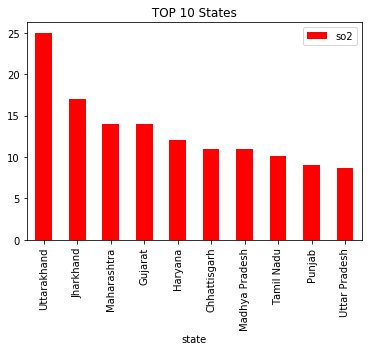

In [11]:
data[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=False).head(10).plot.bar(color='r' , title = ' TOP 10 States ')
plt.show()

In [12]:
def AQIForSO2(so2):
    if(0<=so2 and so2<=40):
        I = ((50*so2)/(40))
    elif(41<=so2 and so2<=80):
        I = (((100-51)*(so2-41))/(80-41))+51
    elif(81<=so2 and so2<=380):
        I = (((200-101)*(so2-81))/(380-81))+101
    elif(381<=so2 and so2<=800):
        I = (((300-201)*(so2-381))/(800-381))+201
    elif(801<=so2 and so2<=1600):
        I = (((400-301)*(so2-801))/(1600-801))+301
    else:
        I = (((500-401)*(so2-1600))/(1600))+401
    return I

In [13]:
data['saqi']=data['so2'].apply(AQIForSO2)
df= data[['so2','saqi']]
data.head()

,state,so2,no2,rspm,date,year,month,day,saqi
11016,Andhra Pradesh,4.0,9.0,36.0,2010-03-02,2010,3,2,5.0
11017,Andhra Pradesh,4.0,9.0,41.0,2010-05-02,2010,5,2,5.0
11018,Andhra Pradesh,4.0,9.0,37.0,2010-09-02,2010,9,2,5.0
11019,Andhra Pradesh,4.0,9.0,40.0,2010-11-02,2010,11,2,5.0
11020,Andhra Pradesh,4.0,9.0,44.0,2010-02-15,2010,2,15,5.0


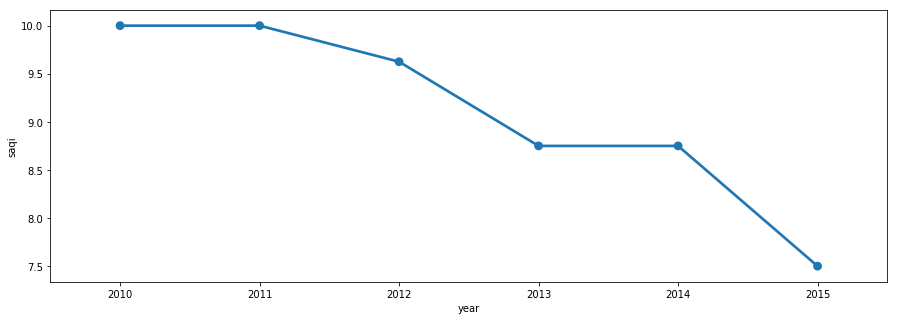

In [14]:
df = data[['saqi','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='saqi', data=df)

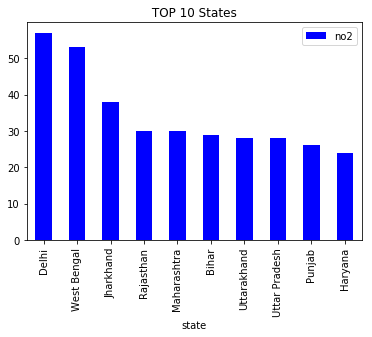

In [15]:
data[['no2','state']].groupby(["state"]).median().sort_values(by='no2',ascending=False).head(10).plot.bar(color='b' , title = ' TOP 10 States ')
plt.show()

In [16]:
def AQIForNO2(no2):
    if(0<=no2 and no2<=40):
        NI = ((50*no2)/(40))
    elif(41<=no2 and no2<=80):
        NI = (((100-51)*(no2-41))/(80-41))+51
    elif(81<=no2 and no2<=180):
        NI = (((200-101)*(no2-81))/(180-81))+101
    elif(181<=no2 and no2<=280):
        NI = (((300-201)*(no2-181))/(280-181))+201
    elif(281<=no2 and no2<=400):
        NI = (((400-301)*(no2-281))/(400-281))+301
    else:
        NI = (((500-401)*(no2-400))/(400))+401
    return NI

In [17]:
data['naqi']=data['no2'].apply(AQIForNO2)
df= data[['no2','naqi']]
data.head()

,state,so2,no2,rspm,date,year,month,day,saqi,naqi
11016,Andhra Pradesh,4.0,9.0,36.0,2010-03-02,2010,3,2,5.0,11.25
11017,Andhra Pradesh,4.0,9.0,41.0,2010-05-02,2010,5,2,5.0,11.25
11018,Andhra Pradesh,4.0,9.0,37.0,2010-09-02,2010,9,2,5.0,11.25
11019,Andhra Pradesh,4.0,9.0,40.0,2010-11-02,2010,11,2,5.0,11.25
11020,Andhra Pradesh,4.0,9.0,44.0,2010-02-15,2010,2,15,5.0,11.25


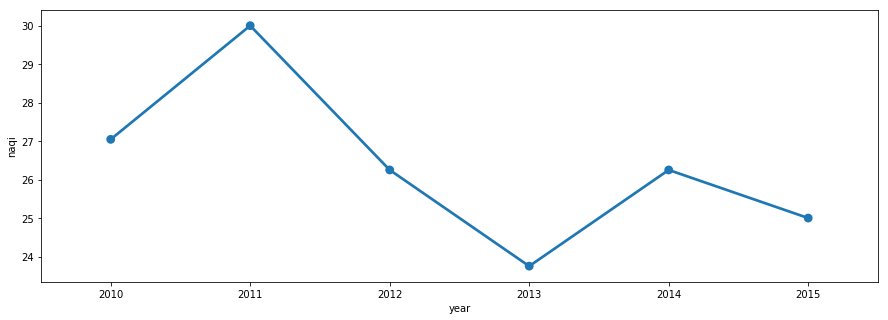

In [18]:
df = data[['naqi','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='naqi', data=df)

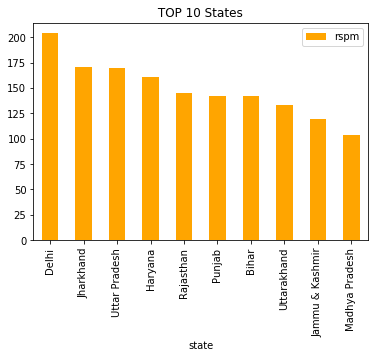

In [19]:
data[['rspm','state']].groupby(["state"]).median().sort_values(by='rspm',ascending=False).head(10).plot.bar(color='orange' , title = ' TOP 10 States ')
plt.show()

In [20]:
def AQIForRSPM(rspm):
    c=rspm
    if(0<=c and c<=50):
        I = ((50*c)/(50))
    elif(50<c and c<=100):
        I = (((100-50)*(c-50))/(100-50))+50
    elif(100<c and c<=250):
        I = (((200-100)*(c-100))/(250-100))+100
    elif(250<c and c<=350):
        I = (((201-300)*(c-250))/(350-250))+200
    elif(350<c and c<=430):
        I = (((400-300)*(c-350))/(430-350))+300
    else:
        I = (((500-400)*(c-430))/(700-430))+400
    return I

In [21]:
data['rspi']=data['rspm'].apply(AQIForRSPM)
df= data[['rspm','rspi']]

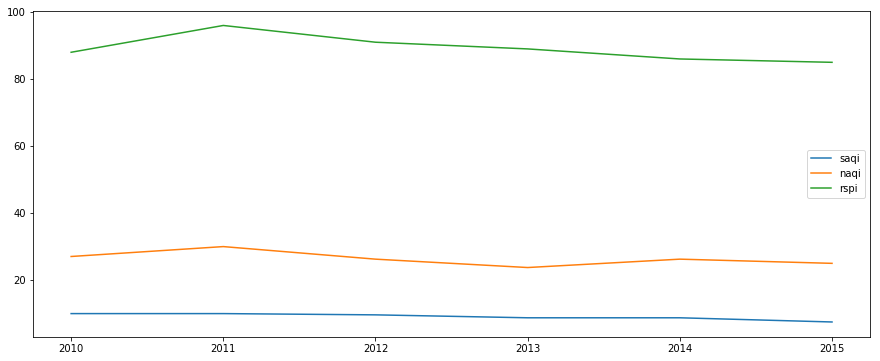

In [22]:
df = data[['naqi','saqi','rspi','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
x=df[['year']]
y1=df[['saqi']]
y2=df[['naqi']]
y3=df[['rspi']]
plt.figure(figsize=(15,6))
plt.plot(x, y1, label = "saqi")
plt.plot(x, y2, label = "naqi")
plt.plot(x, y3, label = "rspi")
plt.legend()
plt.show()

In [23]:
data['AQI'] = data[['saqi','naqi','rspi']].max(axis=1)

In [24]:
data=data.drop('date',axis=1)
data=data.drop('state', axis=1)

In [25]:
data.head(3)

,so2,no2,rspm,year,month,day,saqi,naqi,rspi,AQI
11016,4.0,9.0,36.0,2010,3,2,5.0,11.25,36.0,36.0
11017,4.0,9.0,41.0,2010,5,2,5.0,11.25,41.0,41.0
11018,4.0,9.0,37.0,2010,9,2,5.0,11.25,37.0,37.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239271 entries, 11016 to 435738
Data columns (total 10 columns):
so2      239271 non-null float64
no2      239271 non-null float64
rspm     239271 non-null float64
year     239271 non-null int64
month    239271 non-null int64
day      239271 non-null int64
saqi     239271 non-null float64
naqi     239271 non-null float64
rspi     239271 non-null float64
AQI      239271 non-null float64
dtypes: float64(7), int64(3)
memory usage: 20.1 MB


In [27]:
data.describe()

,so2,no2,rspm,year,month,day,saqi,naqi,rspi,AQI
count,239271.000000,239271.000000,239271.000000,239271.000000,239271.000000,239271.000000,239271.000000,239271.000000,239271.000000,239271.000000
mean,9.703774,24.862450,107.371171,2012.719439,6.513924,15.646393,12.017736,31.231422,95.725423,96.682010
std,10.913717,18.306441,73.795211,1.710543,3.446243,8.726893,11.618266,23.843099,54.058344,54.312204
min,0.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.000000,56.000000,2011.000000,4.000000,8.000000,5.000000,16.250000,56.000000,57.000000
50%,7.000000,21.000000,88.000000,2013.000000,6.000000,16.000000,8.750000,26.250000,88.000000,89.000000
75%,12.900000,31.000000,140.000000,2014.000000,10.000000,23.000000,16.125000,38.750000,126.000000,126.000000
max,909.000000,876.000000,6307.033333,2015.000000,12.000000,31.000000,314.381727,518.810000,2576.679012,2576.679012


In [28]:
X = data.drop('AQI',axis=1)
y = data['AQI']

In [29]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

NameError: name 'X' is not defined

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.05, 
                          max_depth = 6, alpha = 10, n_estimators = 25)

In [32]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 12.129198


In [34]:
accuracy_test = xg_reg.score(X_test,y_test)
print('accuracy_score on test dataset : ', 100*accuracy_test)

accuracy_score on test dataset :  95.0673471349283
